In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from GimmePandas import ReadToPandas

In [393]:
correct_files = []
for i in range (1,56): #I used the original data and it had those problem files so I filtered them out
    if i<10:
        a = "../Data/TenExSpectra_JSON/00"+str(i)+".json"
    elif i==18 or i==40 or i==43:
        continue
    else:
        a = "../Data/TenExSpectra_JSON/0"+str(i)+".json"
    correct_files.append(a)
print(correct_files)
print(len(correct_files))

['../Data/TenExSpectra_JSON/001.json', '../Data/TenExSpectra_JSON/002.json', '../Data/TenExSpectra_JSON/003.json', '../Data/TenExSpectra_JSON/004.json', '../Data/TenExSpectra_JSON/005.json', '../Data/TenExSpectra_JSON/006.json', '../Data/TenExSpectra_JSON/007.json', '../Data/TenExSpectra_JSON/008.json', '../Data/TenExSpectra_JSON/009.json', '../Data/TenExSpectra_JSON/010.json', '../Data/TenExSpectra_JSON/011.json', '../Data/TenExSpectra_JSON/012.json', '../Data/TenExSpectra_JSON/013.json', '../Data/TenExSpectra_JSON/014.json', '../Data/TenExSpectra_JSON/015.json', '../Data/TenExSpectra_JSON/016.json', '../Data/TenExSpectra_JSON/017.json', '../Data/TenExSpectra_JSON/019.json', '../Data/TenExSpectra_JSON/020.json', '../Data/TenExSpectra_JSON/021.json', '../Data/TenExSpectra_JSON/022.json', '../Data/TenExSpectra_JSON/023.json', '../Data/TenExSpectra_JSON/024.json', '../Data/TenExSpectra_JSON/025.json', '../Data/TenExSpectra_JSON/026.json', '../Data/TenExSpectra_JSON/027.json', '../Data/Te

In [394]:
data = ReadToPandas(correct_files)

origdata = data
df = data.sample(frac=1).reset_index(drop=True) #suffle the data to randomize spectras in training and test set

Dataframe loaded


In [392]:
df

,Excitation,Baseline,Peak,FWHM points,Xdata,Reflectivity
0,400,98.744,548.301,"[513.3230583341267, 583.2785018913012]","[180.846649169922, 181.7938742229098, 182.7410...","[98.67197875166002, 99.57503320053121, 100.424..."
1,260,97.5492,602.366,"[493.7656225009383, 710.965991609907]","[180.846649169922, 181.7938742229098, 182.7410...","[93.605220228385, 93.24236517218974, 94.383878..."
2,300,97.9996,458.788,"[392.96960705296664, 524.6061943917355]","[180.846649169922, 181.7938742229098, 182.7410...","[94.84561752988047, 93.32674246169056, 92.4626..."
3,200,99.756,578.055,"[526.1106125327501, 630.0]","[180.846649169922, 181.7938742229098, 182.7410...","[99.20191540303273, 99.62294640452464, 101.433..."
4,220,98.4472,622.334,"[534.4311231044703, 710.237529754083]","[180.846649169922, 181.7938742229098, 182.7410...","[98.95517867958813, 98.0398024839144, 98.50237..."
...,...,...,...,...,...,...
518,240,100.341,608.304,"[500.0, 716.6075596387113]","[180.846649169922, 181.7938742229098, 182.7410...","[99.01490275322051, 99.72250252270435, 96.8679..."
519,280,99.1626,603.964,"[530.6238669557937, 677.3046357047076]","[180.846649169922, 181.7938742229098, 182.7410...","[89.0600106213489, 92.77807063784924, 95.45712..."
520,240,98.8033,523.854,"[450.51360094677136, 597.1943696956853]","[180.846649169922, 181.7938742229098, 182.7410...","[94.85205677171037, 94.95456719273075, 95.5303..."
521,280,98.7836,575.004,"[508.057594840576, 641.9508093908667]","[180.846649169922, 181.7938742229098, 182.7410...","[98.74061516105594, 98.48192771084338, 97.1045..."


In [4]:
#ML objective: learn to predict correct baseline constant (for test spectras) based on Reflectivity spectras and correct baseline values (train)

In [395]:
x_sufl = df["Reflectivity"] #Separate just the input values from the dictionary
y_sufl = df["Baseline"]

In [396]:
x_sufl_arr = pd.DataFrame(x_sufl.to_list()) #separating data to individual "cells"

In [397]:
x_sufl_train = x_sufl_arr.head(419) #divide data to train and test sets
x_sufl_test = x_sufl_arr.tail(104)
y_sufl_train = y_sufl.head(419)
y_sufl_test = y_sufl.tail(104)


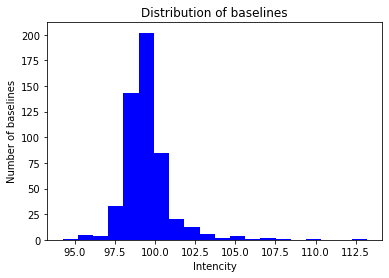

Mean value of baselines in dataset: 99.51 eV


In [398]:
#Visualize data with histograms (whole data and then train and test to see that they represent well)
plt.hist(y_sufl, bins=20, density=False, facecolor='blue')
plt.xlabel("Intencity")
plt.ylabel("Number of baselines")
plt.title("Distribution of baselines")
plt.show()

## mean value of distribution
print("Mean value of baselines in dataset: %0.2f eV" %np.mean(y_sufl))

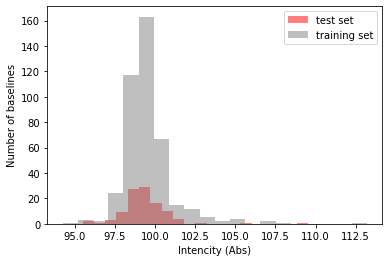

Mean value of baselines in training set: 99.53 eV
Mean value of baselines in test set: 99.42 eV


In [399]:
plt.hist(y_sufl_test, bins=20, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_sufl_train, bins=20, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("Intencity (Abs)")
plt.ylabel("Number of baselines")
plt.legend()
plt.show()

## mean value of distributions
print("Mean value of baselines in training set: %0.2f eV" %np.mean(y_sufl_train))
print("Mean value of baselines in test set: %0.2f eV" %np.mean(y_sufl_test))

In [400]:
# Instantiate a Gaussian Process model
kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-4, 1e4))
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2, alpha=0.1) 

In [401]:
# Notes from hyperparameter optimization:
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) --> 18.5**2 * RBF(length_scale=100) --> MAE= 1.1554
#kernel = C(1.0) * RBF(10) --> 47.4**2 * RBF(length_scale=470) --> MAE= 0.8643
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.8431
#kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.8431
#kernel = C(10, (1e-3, 1e3)) * RBF(1, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.8431
#kernel = C(10, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.8431
#kernel = C(10, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.8431
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.8431
#kernel = C(30, (1e-3, 1e3)) * RBF(300, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.8431
#kernel = C(30, (1e-3, 1e3)) * RBF(1000, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=328) --> MAE= 0.
#kernel = C(30, (1e-3, 1e3)) * RBF(300, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=1.86), alpha=10e-4 --> MAE= 99.42995
#kernel = C(30, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=211), alpha=10e-4 --> MAE= 1.1251
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=211), alpha=10e-4 --> MAE= 1.1251
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=213), alpha=10e-3 --> MAE= 1.1195
#kernel = C(30, (1e-3, 1e3)) * RBF(500, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=213), aplha=10e-3 --> MAE= 1.1195
#kernel = C(30, (1e-3, 1e3)) * RBF(1000, (1e-4, 1e4)) --> 31.6**2 * RBF(length_scale=213), alpha=10e-3 --> MAE= 1.1195
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=236), alpha=10e-2 --> MAE=1.0550
#kernel = C(30, (1e-3, 1e3)) * RBF(1000, (1e-4, 1e4)) --> 31.6**2 * RBF(length_scale=236), alpha=10e-2, restart=3 --> MAE= 1.0550
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=854), alpha=10e-1, restrat=2 --> MAE=0.47648
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-3, 1e3)) --> 31.6**2 * RBF(length_scale=1e+03), alpha=10e0 --> MAE=0.4422
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-4, 1e4)) --> 31.6**2 * RBF(length_scale=2.43e+03), alpha=10e0 --> MAE=0.44276
#kernel = C(30, (1e-3, 1e3)) * RBF(1000, (1e-4, 1e4)) --> 31.6**2 * RBF(length_scale=2.43e+03), alpha=10e0 --> MAE=0.44276
#kernel = C(30, (1e-3, 1e3)) * RBF(1000, (1e-4, 1e4)) --> 31.6**2 * RBF(length_scale=5.83e+03), alpha=10e1 --> MAE=0.69305
#kernel = C(30, (1e-3, 1e3)) * RBF(1000, (1e-4, 1e4)) --> 31.6**2 * RBF(length_scale=1e+04), alpha=10e2 --> MAE=0.7594
#kernel = C(30, (1e-3, 1e3)) * RBF(1000, (1e-5, 1e5)) --> 31.6**2 * RBF(length_scale=1e+05), alpha=10e2 --> MAE=0.7629

In [402]:
gp.fit(x_sufl_train, y_sufl_train)


GaussianProcessRegressor(alpha=0.1, kernel=5.48**2 * RBF(length_scale=100),
                         n_restarts_optimizer=2)

In [403]:
# print(gp) 
gp.get_params
gp.kernel_ #see how the parameters ended up after automatic optimization

31.6**2 * RBF(length_scale=272)

In [404]:


y_pred, sigma = gp.predict(x_sufl_test, return_std=True)
#print(sigma)

#print(y_pred)
#print(np.concatenate([y_pred - 1.9600 * sigma, (y_pred + 1.9600 * sigma)[::-1]]))

In [405]:
#Mean absolute error:
print("MAE:")
print(np.abs(y_pred-y_sufl_test).mean())

MAE:
1.156230549158388


In [406]:
#alpha=0.0001 --> MAE=1.12566
#alpha=0.001 --> MAE=1.12511
#alpha=0.01 --> MAE=1.119503
#alpha=0.1 --> MAE=1.05502
#alpha=1 --> MAE=0.476477
#alpha=10 --> MAE0.44221, proper limits --> MAE=0.44276
#alpha=100 --> MAE=0.50916, proper limits --> MAE=0.693046

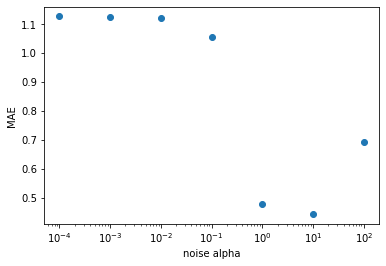

Range of baseline values in test set: 14.04 and noise alpha 10 is 71.22 % of it.


In [407]:
#How the noise value alpha affects the MAE: --> since the range of baseline values is only ~10, the noise can be max 0.1
alpha = [0.0001,0.001,0.01,0.1,1,10,100]
MAE = [1.12566, 1.12511, 1.11950, 1.05502, 0.47648, 0.44276, 0.69305]
plt.plot(alpha, MAE, 'o')
plt.xscale('log')
plt.xlabel('noise alpha')
plt.ylabel('MAE')
plt.show()

rangen=np.max(y_sufl_test)-np.min(y_sufl_test)
nfr = 10/rangen*100
#print(nfr)
#print(rangen)
print("Range of baseline values in test set: %0.2f and noise alpha 10 is %0.2f %% of it." % (rangen, nfr))

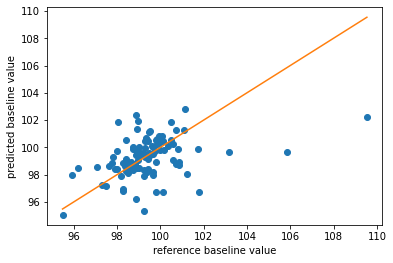

0.9911602022518967


In [408]:
#Plotting the results of prediction:
plt.plot(y_sufl_test, y_pred, 'o')
plt.plot([np.min(y_sufl_test),np.max(y_sufl_test)], [np.min(y_sufl_test),np.max(y_sufl_test)], '-')
plt.xlabel('reference baseline value')
plt.ylabel('predicted baseline value')
plt.show()
R_score = gp.score(x_sufl_train, y_sufl_train)
print(R_score)

In [409]:
# Results from data suffling (cross-validation):
#kernel = C(30, (1e-3, 1e3)) * RBF(100, (1e-4, 1e4)), alpha=0.1, MAE=1.055, R2=0.994
#suffling data:
#MAE=1.117, R2=0.993
#MAE=1.053, R2=0.991
#MAE=1.028, R2=0.994